In [119]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
import pandas as pd
from FRespuestastyfdefiltrosFIReIIR import FIRrespt,IIRrespt,FIRrespf,IIRrespf
from FTransformaciones_tiempo_frecuencia import Espectro, señal
from FMedia_Movil import MovingAverage
from scipy.optimize import curve_fit
from scipy import signal #detrend

# Introducción a los filtros digitales
### HERRAMIENTAS: 
### (1) Ajustes de curvas (eliminar tendencia lineal, periódica, etc.) 
### (2) Empleo del espectro (eliminar componentes de alta, baja y media frecuencia puntuales) 
### (3) Empleo de la función "detrend" (elimar tendencias)
### (4) Suavizado con filtro Savitzky-Golay

- - -

### (A) Interferencias en bajas frecuencias

In [3]:
ecg1 = np.loadtxt('ecg1.txt'); ecg2 = np.loadtxt('ecg2.txt')
ecg3 = np.loadtxt('ecg3.txt'); ecg4 = np.loadtxt('ecg4.txt')
N = len(ecg3); n = np.arange(N)

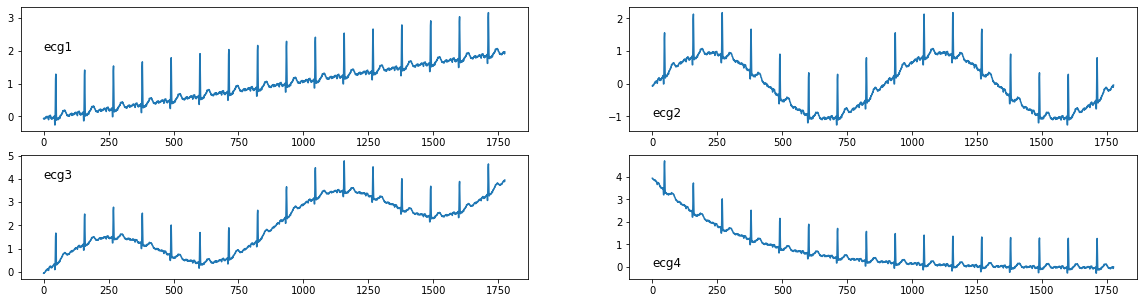

In [5]:
plt.figure(figsize=(20,5))
plt.subplot(2,2,1)
plt.plot(n, ecg1)
plt.text(0,2,'ecg1',fontsize=12)

plt.subplot(2,2,2)
plt.plot(n, ecg2)
plt.text(0,-1,'ecg2',fontsize=12)

plt.subplot(2,2,3)
plt.plot(n, ecg3)
plt.text(0,4,'ecg3',fontsize=12)

plt.subplot(2,2,4)
plt.plot(n, ecg4)
plt.text(0,0,'ecg4',fontsize=12)
plt.show()

### Eliminamos la tendencia lineal usando ajuste de curvas

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [6]:
def flineal(x,a,b): #defino la función lineal (a:pendiente - b: ord. al origen)
    return a*x + b

In [7]:
popt, pcov = curve_fit(flineal, n, ecg1) #realizo el ajuste
#popt: parametros optimos 
#pcov: matriz de covarianza entre ellos

In [9]:
popt

array([ 0.00112668, -0.0212102 ])

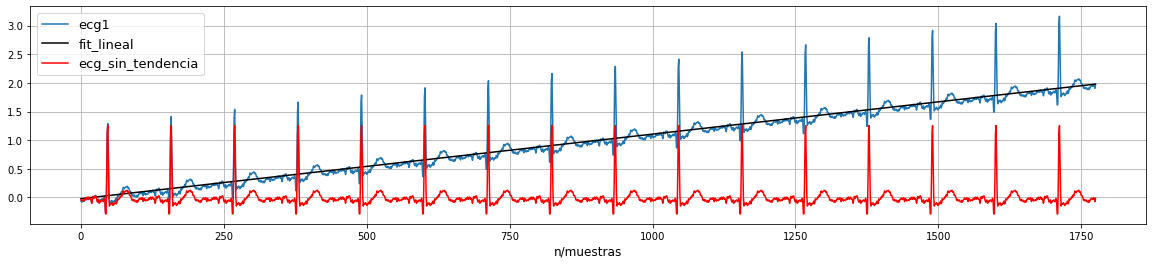

In [11]:
y1 = ecg1 - flineal(n,*popt)

plt.figure(figsize=(20,4))
plt.plot(n, ecg1,label='ecg1')
plt.plot(n,flineal(n,*popt),'k',label='fit_lineal')
plt.plot(n,y1,'r',label='ecg_sin_tendencia')
plt.xlabel('n/muestras',fontsize=12)
plt.legend(fontsize=13)
plt.grid(True)
plt.show()

### Eliminamos la tendencia periódica usando: 
### (a) ajuste de curvas
### (b) espectro
### (c) detrend

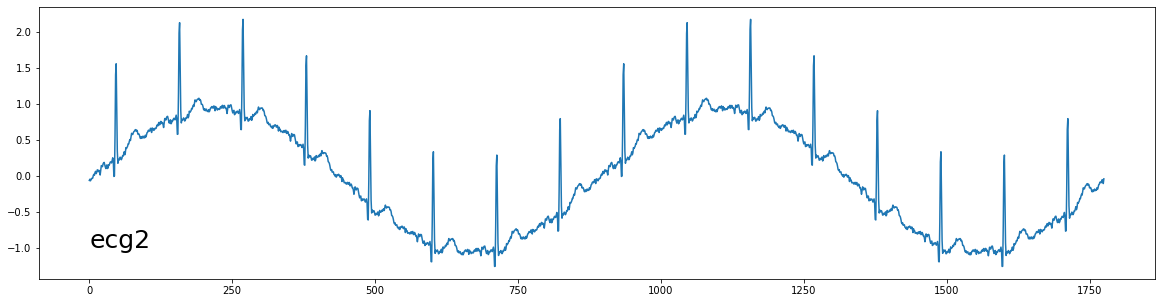

In [13]:
plt.figure(figsize=(20,5))
plt.plot(n, ecg2)
plt.text(0,-1,'ecg2',fontsize=25)
plt.show()

### Tarea para la casa: Definir la función senoidal, hacer el ajuste y restar de los datos el ajuste, tal como lo hicimos en el caso de tendencia lineal.

In [32]:
from scipy.optimize import curve_fit

In [33]:
#Tarea

def fsin(x,a,f,c):
    return a*np.sin (2*np.pi*f*x) + c

In [34]:
popt1, pcov1 = curve_fit (fsin,n,ecg2,p0=(0.5,1e-3,0.1)) #realizo el ajuste

In [35]:
popt1

array([ 1.00001982,  0.00112617, -0.0207198 ])

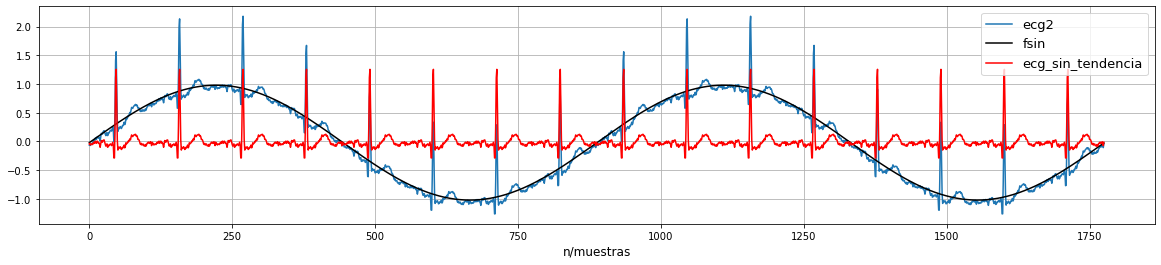

In [37]:
y23 = ecg2 - fsin(n,*popt1)

plt.figure(figsize=(20,4))
plt.plot(n, ecg2,label='ecg2')
plt.plot(n,fsin(n,*popt1),'k',label='fsin')
plt.plot(n,y23,'r',label='ecg_sin_tendencia')
plt.xlabel('n/muestras',fontsize=12)
plt.legend(fontsize=13)
plt.grid(True)
plt.show()

###  Eliminamos la tendencia periódica usando el espectro:

In [93]:
esp = Espectro(ecg2)
N = len(ecg3); n = np.arange(N)
p = np.arange(N)

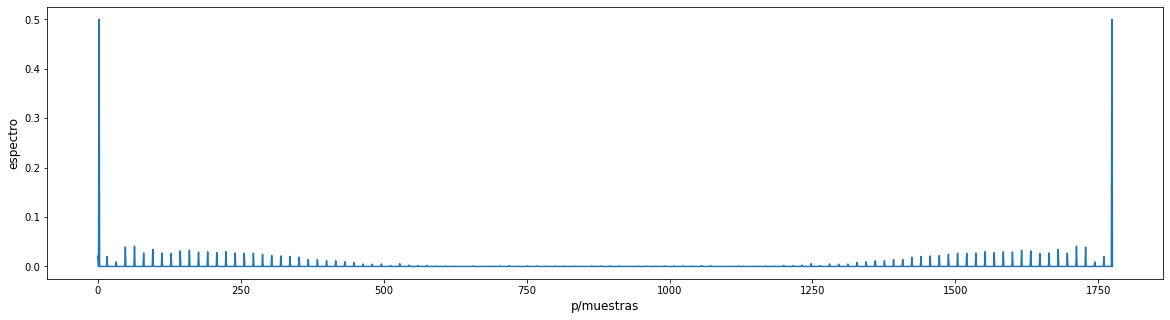

In [107]:
plt.figure(figsize=(20,5))
plt.plot(p,abs(esp))
plt.xlabel('p/muestras',fontsize=12)
plt.ylabel('espectro',fontsize=12)
#plt.xticks(np.arange(20))
#plt.xlim(0,5)
#plt.ylim(0,0.1)
plt.show()

In [103]:
esp_filtr = np.copy(esp)
esp_filtr[0] = 1e-5
esp_filtr[2] = 1e-5
esp_filtr[N-2] = 1e-5

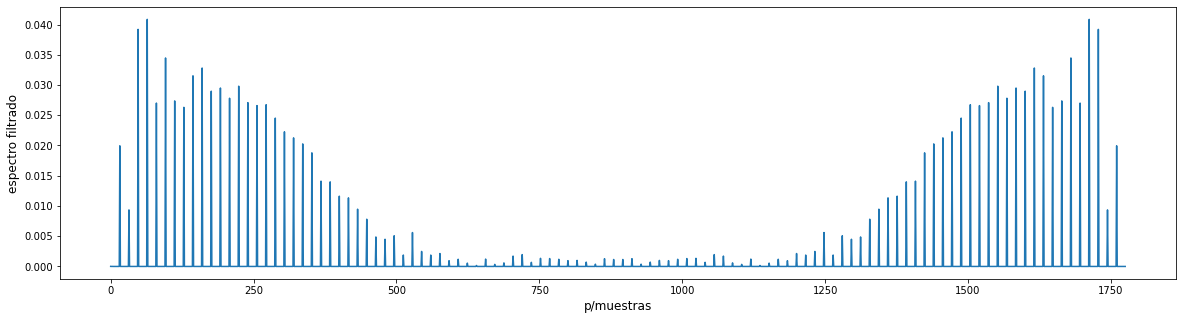

In [105]:
plt.figure(figsize=(20,5))
plt.plot(p,abs(esp_filtr))
plt.xlabel('p/muestras',fontsize=12)
plt.ylabel('espectro filtrado',fontsize=12)
#plt.xticks(np.arange(20))
#plt.xlim(0,20)
#plt.ylim(0,0.1)
plt.show()

In [26]:
y3 = señal(esp_filtr)

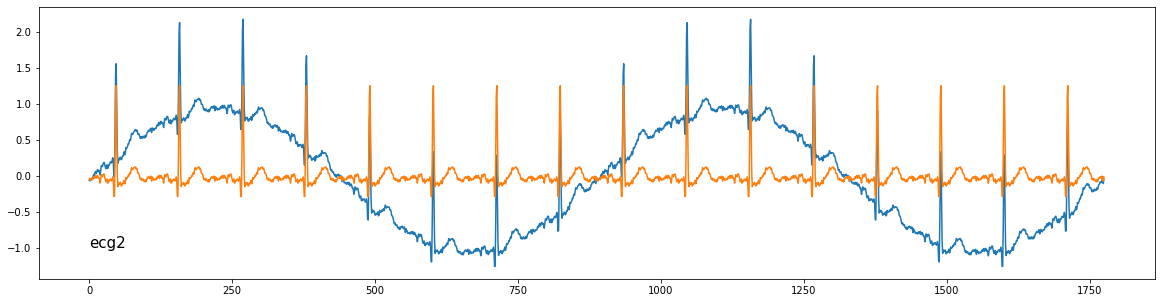

In [27]:
plt.figure(figsize=(20,5))
plt.plot(n, ecg2,label='ecg_con tendencia periódica')
plt.plot(n, y3,label='ecg_sin tendencia')
plt.text(0,-1,'ecg2',fontsize=15)
plt.show()

### Elimino la tendencia periódica empleando "detrend"

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.detrend.html

In [28]:
A = np.arange(0,N,110) #arreglo
B = tuple(A) #tupla
y4 = signal.detrend(ecg2,bp=A)

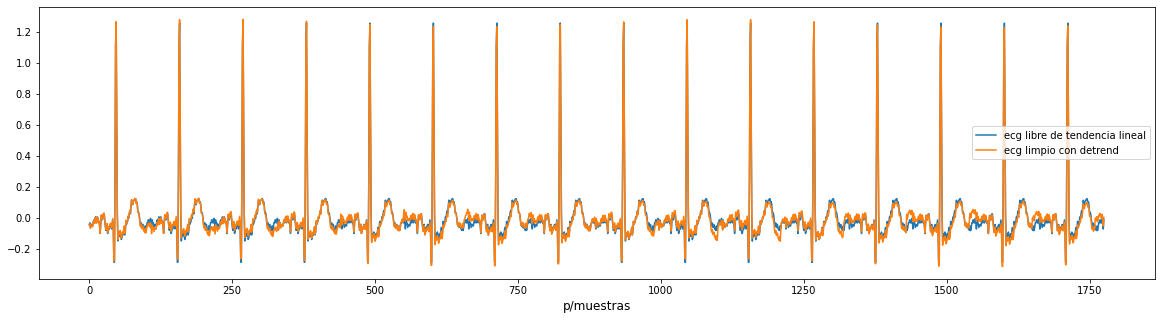

In [29]:
plt.figure(figsize=(20,5))
plt.plot(n,y1,label='ecg libre de tendencia lineal')
plt.plot(n,y4,label='ecg limpio con detrend')
plt.legend()
plt.xlabel('p/muestras',fontsize=12)
plt.show()

### Tarea para la casa: 
### Definir la/s función/es correspondientes a los ecg3 y 4, hacer el/los ajuste/s y restar de los datos el/los ajuste/s, tal como lo hicimos en el caso de tendencia lineal.

In [108]:
#Tarea ECG3
N = len(ecg3); n = np.arange(N)

popt3, pcov3 = curve_fit(flineal, n, ecg3) #realizo el ajuste
#popt: parametros optimos 
#pcov: matriz de covarianza entre ellos

popt3

array([0.00171512, 0.45598394])

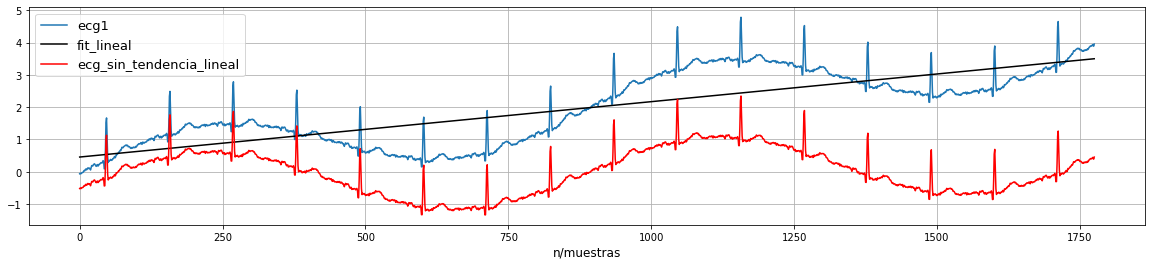

In [109]:
y3 = ecg3 - flineal(n,*popt3)

plt.figure(figsize=(20,4))
plt.plot(n, ecg3,label='ecg1')
plt.plot(n,flineal(n,*popt3),'k',label='fit_lineal')
plt.plot(n,y3,'r',label='ecg_sin_tendencia_lineal')
plt.xlabel('n/muestras',fontsize=12)
plt.legend(fontsize=13)
plt.grid(True)
plt.show()

In [120]:
A3 = np.arange(0,N,110) #arreglo
B3 = tuple(A3) #tupla
y33 = signal.detrend(y3,bp=A3)

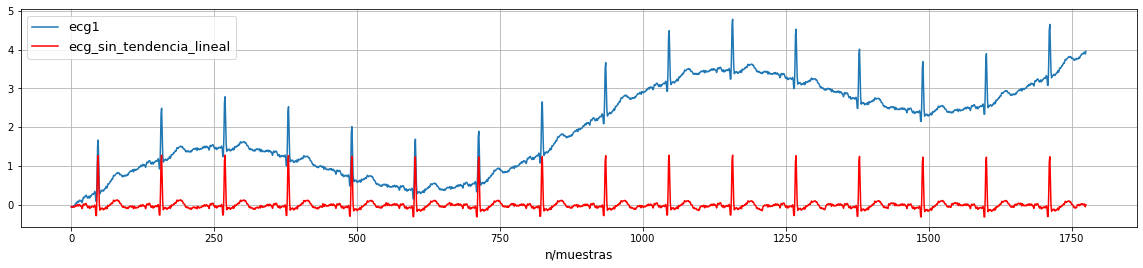

In [121]:
plt.figure(figsize=(20,4))
plt.plot(n, ecg3,label='ecg1')
plt.plot(n,y33,'r',label='ecg_sin_tendencia_lineal')
plt.xlabel('n/muestras',fontsize=12)
plt.legend(fontsize=13)
plt.grid(True)
plt.show()

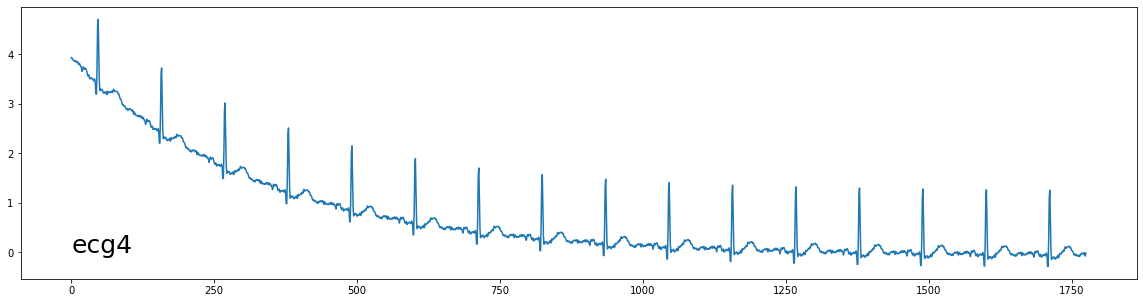

In [40]:
#Tarea ECG4

plt.figure(figsize=(20,5))
plt.plot(n, ecg4)
plt.text(0,0,'ecg4',fontsize=25)
plt.show()

### Tendencia NO periódica
### a) Empleando ajuste de una función exponencial
### b) Empleando suavizado con filtro Savatzky-Golay
### c) Empleando suavizado media móvil

In [41]:
# Opción a): Empleando ajuste de una función exponencial

def fexp (x,a,b,c):
    return a*np.exp(-b*x)+c

In [42]:
popt2 , pcov2 = curve_fit (fexp,n,ecg4,p0=(1,1e-3,0.1)) #realizo el ajuste

In [43]:
popt2

array([ 3.99737748e+00,  2.99690741e-03, -2.09797135e-02])

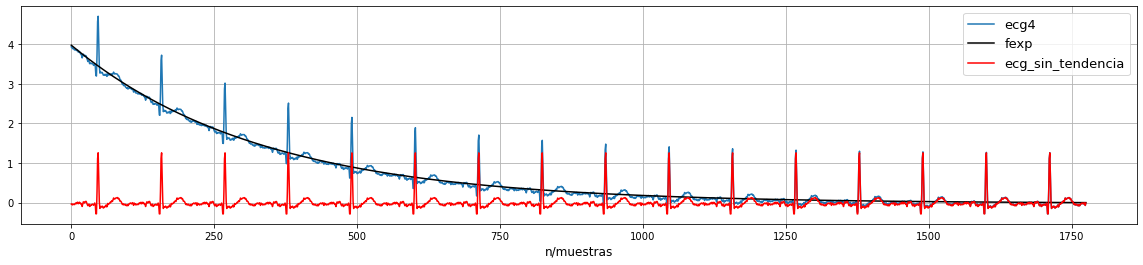

In [46]:
y44 = ecg4 - fexp(n,*popt2)

plt.figure(figsize=(20,4))
plt.plot(n, ecg4,label='ecg4')
plt.plot(n,fexp(n,*popt2),'k',label='fexp')
plt.plot(n,y44,'r',label='ecg_sin_tendencia')
plt.xlabel('n/muestras',fontsize=12)
plt.legend(fontsize=13)
plt.grid(True)
plt.show()

In [47]:
# Opción b): Empleando suavizado con filtro Savitzky-Golay

y_4 = signal.savgol_filter (ecg4,181,3) #window size 181, polynomial orden 3 

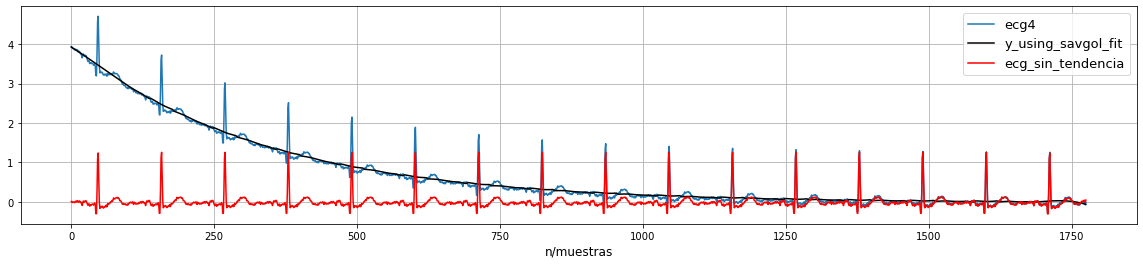

In [48]:
y_44 = ecg4 - y_4

plt.figure(figsize=(20,4))
plt.plot(n, ecg4,label='ecg4')
plt.plot(n,y_4,'k',label='y_using_savgol_fit')
plt.plot(n,y_44,'r',label='ecg_sin_tendencia')
plt.xlabel('n/muestras',fontsize=12)
plt.legend(fontsize=13)
plt.grid(True)
plt.show()

### Estudiar la eliminacion de tendencia aperiódica usando suavizado con filtro Savitzky-Golay
https://es.wikipedia.org/wiki/Filtro_de_Savitzky%E2%80%93Golay

https://sodocumentation.net/es/scipy/topic/4535/suavizar-una-senal

- - -

### (B) Interferencias en frecuencias intermedias:

In [123]:
df1 = pd.read_excel('Ecg50.xls', header=None)
ecg_50 = df1.to_numpy()

In [124]:
ecg_50

array([[ -5. ],
       [  2.8],
       [ -3. ],
       ...,
       [-13.6],
       [-18.6],
       [-27.2]])

In [125]:
ecg_50 = np.concatenate(ecg_50)

In [126]:
ecg_50

array([ -5. ,   2.8,  -3. , ..., -13.6, -18.6, -27.2])

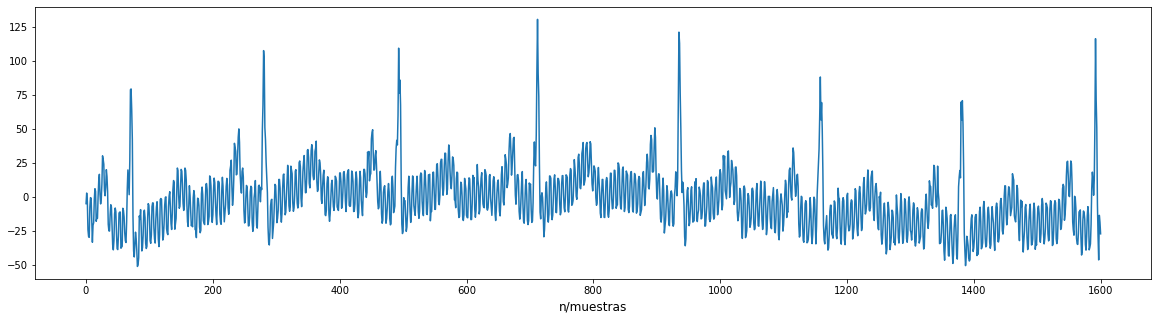

In [127]:
plt.figure(figsize=(20,5))
plt.plot(ecg_50,label='ecg_50')
plt.xlabel('n/muestras',fontsize=12)
plt.show()

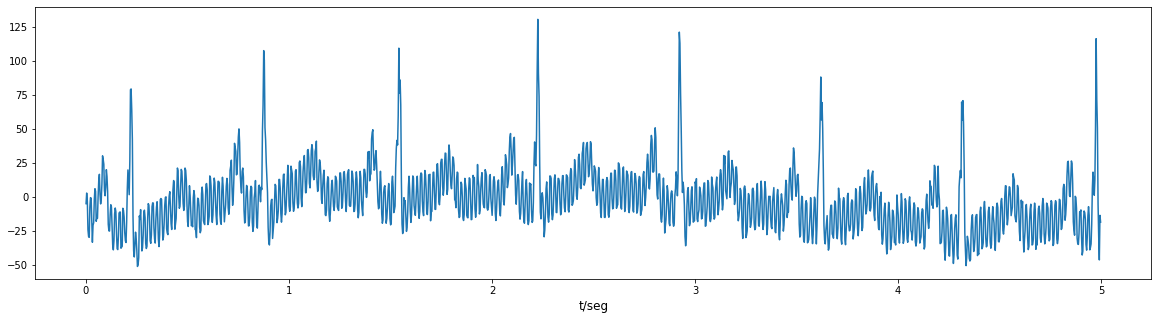

In [128]:
Fs = 320; N = 1600; n = np.arange(N); ecg50 = ecg_50[:N]
plt.figure(figsize=(20,5))
plt.plot(n/Fs,ecg50,label='ecg_50')
plt.xlabel('t/seg',fontsize=12)
plt.show()

In [129]:
espec = Espectro(ecg50)
p = np.arange(N)

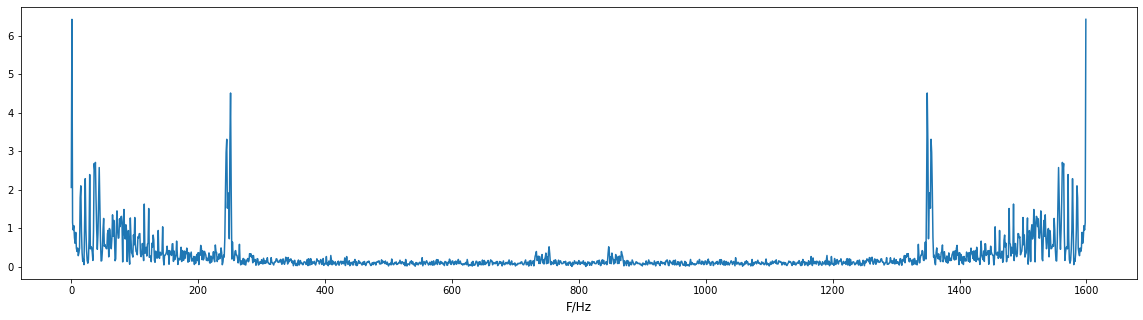

In [133]:
plt.figure(figsize=(20,5))
plt.plot(p,abs(espec))
plt.xlabel('F/Hz',fontsize=12)
#plt.xticks(np.arange(10))
#plt.xlim(240,255)
#plt.xlim (0,10)
#plt.ylim(0,0.1)
plt.show()

In [65]:
esp_fil = np.copy(espec)
esp_fil[0] = 1e-5
esp_fil[1] = 1e-5
esp_fil[N-1] = 1e-5
esp_fil[242:253] = 1e-5
esp_fil[(N-253):(N-242)] = 1e-5

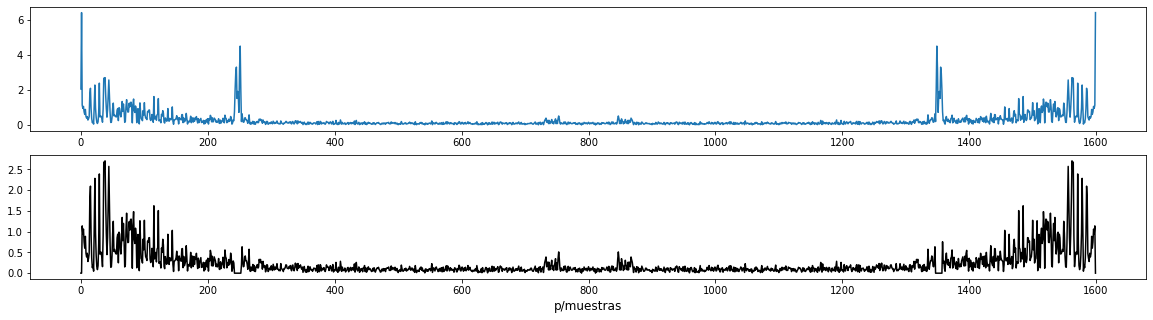

In [66]:
plt.figure(figsize=(20,5))
plt.subplot(2,1,1)
plt.plot(p,abs(espec),label='espec')
plt.subplot(2,1,2)
plt.plot(p,abs(esp_fil),'k',label='espec_filtr')
plt.xlabel('p/muestras',fontsize=12)
#plt.xticks(np.arange(10))
#plt.xlim(240,255)
#plt.ylim(0,0.1)
plt.show()

In [67]:
ecg_fil = señal(esp_fil)

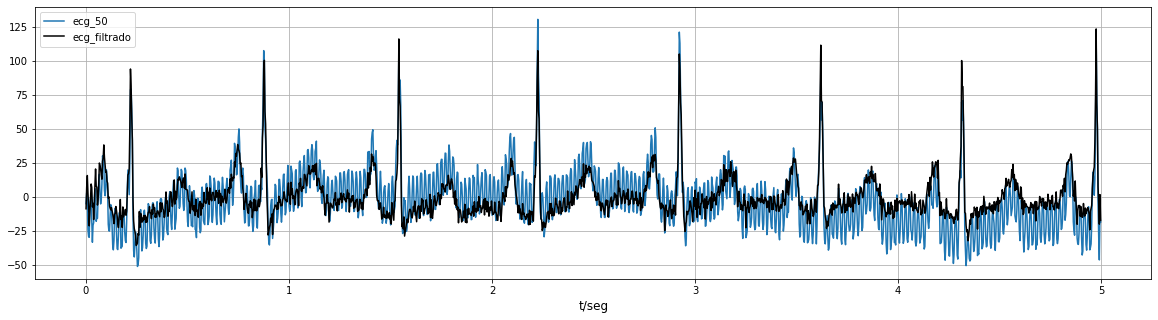

In [69]:
plt.figure(figsize=(20,5))
plt.plot(n/Fs,ecg50,label='ecg_50')
plt.plot(n/Fs,ecg_fil,'k',label='ecg_filtrado')
plt.legend()
plt.xlabel('t/seg',fontsize=12)
plt.grid (True)
plt.show()

- - -

### (C) Interferencias en alta frecuencia

In [70]:
ecg_estim = np.loadtxt('EcgEstimVago.txt')
N = len(ecg_estim); n = np.arange(N)

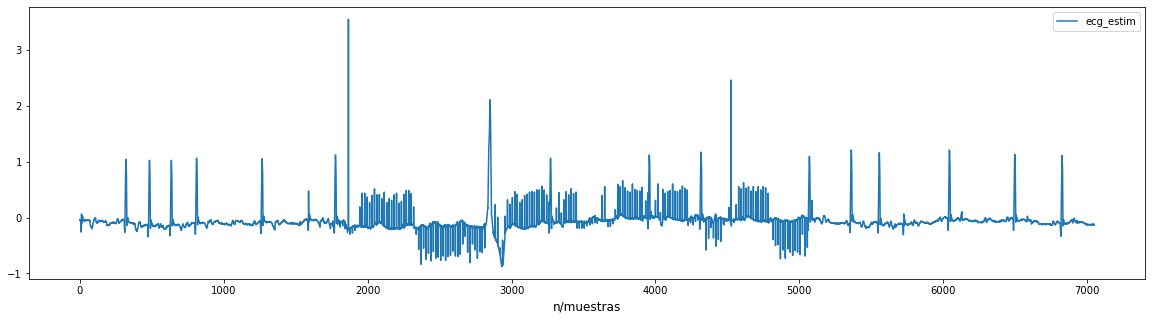

In [71]:
plt.figure(figsize=(20,5))
plt.plot(n,ecg_estim,label='ecg_estim')
plt.legend()
plt.xlabel('n/muestras',fontsize=12)
plt.show()

In [72]:
signal = ecg_estim[2000:5000] #parte que tiene interferencia
N = len(signal); n = np.arange(N)

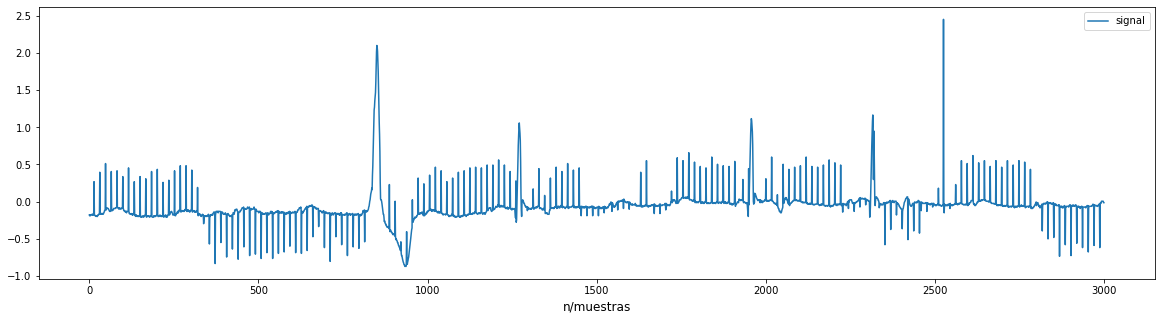

In [88]:
plt.figure(figsize=(20,5))
plt.plot(n,signal,label='signal')
plt.legend()
plt.xlabel('n/muestras',fontsize=12)
plt.show()

In [74]:
esp2 = Espectro(signal)
p = np.arange(N)

In [75]:
ventana = np.piecewise(p, [abs(p-N/2)>1400],[lambda p: 1, lambda p: 0])

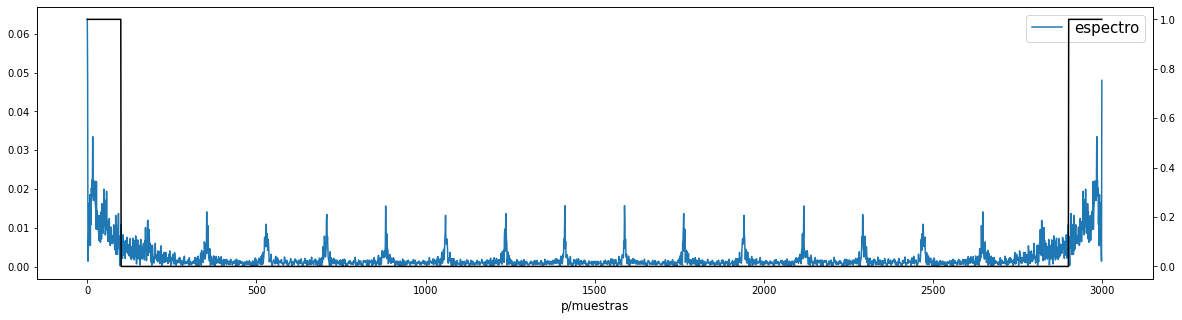

In [76]:
plt.figure(figsize=(20,5))
plt.plot(p,abs(esp2),label='espectro')
plt.legend(fontsize=15)
plt.xlabel('p/muestras',fontsize=12)
plt.twinx()
plt.plot(p,ventana,'k')
plt.show()

In [77]:
espfiltr = esp2 * ventana
espfiltr[0] = 1e-5

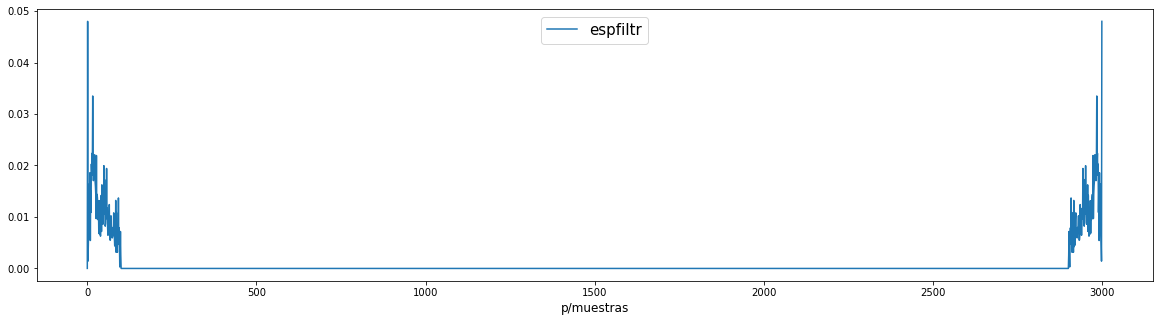

In [89]:
plt.figure(figsize=(20,5))
plt.plot(p,abs(espfiltr),label='espfiltr')
plt.legend(fontsize=15)
plt.xlabel('p/muestras',fontsize=12)
plt.show()

In [79]:
signal_filt = señal(espfiltr)

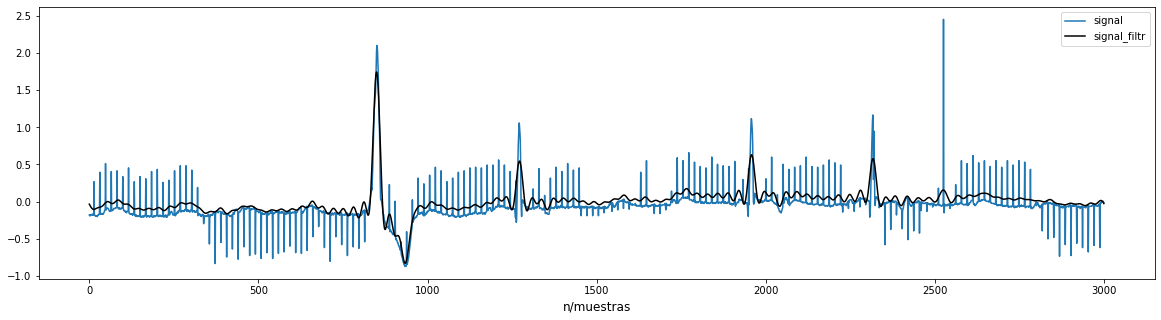

In [81]:
plt.figure(figsize=(20,5))
plt.plot(n,signal,label='signal')
plt.plot(n,signal_filt,'k',label='signal_filtr')
plt.legend()
plt.xlabel('n/muestras',fontsize=12)
plt.show()

- - -

### Suavizado de señales empleando "Media Móvil"

In [82]:
ny = np.arange(1000)
y = 2*np.sin(2*np.pi*0.005*ny) + np.random.normal(0,0.3,1000)

In [83]:
y_suav = MovingAverage(y,50)

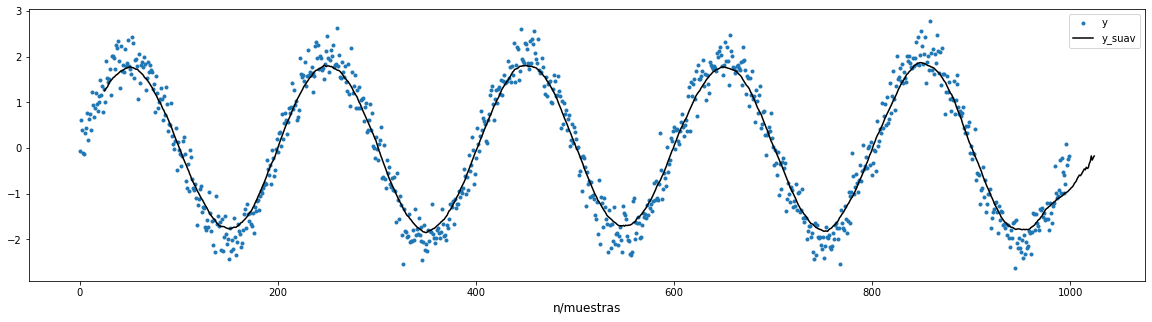

In [87]:
plt.figure(figsize=(20,5))
plt.plot(ny,y,'.',label='y')
plt.plot(ny+25,y_suav,'k',label='y_suav') #+25 porque se desplaza
plt.legend()
plt.xlabel('n/muestras',fontsize=12)
plt.show()

- - -